In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, matthews_corrcoef, roc_curve, auc, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVR, SVR, SVC, LinearSVC
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.under_sampling import RandomUnderSampler

## 📈 Linear Support Vector Regression (SVR)

This function applies **Linear Support Vector Regression (SVR)** to model the relationship between two variables.

- **SVR** is a regression model that uses the principles of Support Vector Machines (SVMs).
- The **Linear kernel** is used here to find a straight-line fit that balances prediction accuracy and model simplicity.
- The model is built using a `Pipeline` that includes:
  - `StandardScaler` – to normalize the feature values.
  - `LinearSVR` – the SVR model with a linear kernel.

### Outputs:
- **R² Score** – goodness of fit.
- **Mean Squared Error (MSE)** – average squared difference between predicted and actual values.
- **Intercept and Coefficients** – parameters of the linear SVR model.
- **Visualization** – scatter plot of actual data and predicted line.
- **Execution Time** – total time taken for training and prediction.

In [7]:
def svr_linear(data, x_label, y_label):
    start_time = time.time()
    
    x = data[x_label].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()

    svm_reg = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svr", LinearSVR(random_state=0, max_iter=2000))
    ])

    svm_reg.fit(x, y) 

    y_pred = svm_reg.predict(x)

    r_sq = svm_reg.score(x, y)
    mse = mean_squared_error(y, y_pred)

    print('R^2:', r_sq)
    print('Mean Squared Error:', mse)
    print('Intercept:', svm_reg["linear_svr"].intercept_)
    print('Slope:', svm_reg["linear_svr"].coef_)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='b')
    plt.plot(x, y_pred, color='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Linear SVR: {x_label} vs {y_label} with R^2 = {r_sq}')
    plt.show()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 📈 Polynomial Support Vector Regression (SVR)

This function performs **Polynomial SVR** to model a non-linear relationship between input and target variables using a polynomial kernel of degree 2.

- **Polynomial Kernel** enables the model to fit curved relationships.
- The function expands the input feature space using `PolynomialFeatures` to capture higher-order interactions.
- The SVR model is built with a `Pipeline` that includes:
  - `StandardScaler` – standardizes input features.
  - `SVR (poly kernel)` – Support Vector Regression with polynomial kernel (`degree=2`, `C=100`, `coef0=1`).

### Outputs:
- **R² Score** – indicates how well the model fits the data.
- **Intercept** – bias term from the SVR model.
- **Prediction Plot** – overlay of predicted curve on original data.
- **Execution Time** – duration for training and plotting.

In [8]:
def svr_poly(data, x_label, y_label):
    start_time = time.time()
    
    x = data[x_label].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()
    
    polynomial_features = PolynomialFeatures(degree=2, include_bias=True)
    x_poly = polynomial_features.fit_transform(x)

    svm_reg = Pipeline([
        ("scaler", StandardScaler()),
        ("poly_svr", SVR(kernel="poly", degree=2, C=100, coef0=1)) 
    ]).fit(x_poly, y) 

    r_sq = svm_reg.score(x_poly, y)

    x_range = np.linspace(x.min(), x.max(), 30).reshape(-1, 1)
    x_range_poly = polynomial_features.transform(x_range)
    y_pred = svm_reg.predict(x_range_poly)
    
    print('R^2: ', r_sq)
    print('Intercept: ', svm_reg["poly_svr"].intercept_)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='b')
    plt.plot(x_range, y_pred, color='r')
    plt.title(f'Polynomial SVR: {x_label} vs {y_label} with R^2 = {r_sq}')
    plt.show()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 📈 Support Vector Regression (SVR) with RBF Kernel

This function applies **SVR with a Radial Basis Function (RBF) kernel** to capture complex, non-linear relationships between the input and target variables.

- The **RBF kernel** maps input features into a higher-dimensional space to fit non-linear patterns.
- The model is built using a `Pipeline` with:
  - `StandardScaler` – normalizes the input features.
  - `SVR (rbf kernel)` – configured with `C=1`, `epsilon=0.1`, and default gamma.

### Outputs:
- **R² Score** – indicates model accuracy.
- **Intercept** – bias term of the trained SVR.
- **Prediction Plot** – displays the model's non-linear fit vs. actual data.
- **Execution Time** – total runtime for training and prediction.

In [9]:
def svr_rbf(data, x_label, y_label):
    start_time = time.time()
    
    x = data[x_label].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()
    
    svm_reg = Pipeline([
        ("scaler", StandardScaler()),
        ("rbf_svr", SVR(kernel="rbf", C=1, cache_size=200, epsilon=0.1,)) 
    ]).fit(x, y) 

    r_sq = svm_reg.score(x, y)

    x_range = np.linspace(x.min(), x.max(), 30).reshape(-1, 1)
    y_pred = svm_reg.predict(x_range)
    
    print('R^2: ', r_sq)
    print('Intercept: ', svm_reg["rbf_svr"].intercept_)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='b')
    plt.plot(x_range, y_pred, color='r')
    plt.title(f'SVR with RBF kernel: {x_label} vs {y_label} with R^2 = {r_sq}')
    plt.show()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 🤖 Linear Support Vector Classification (SVC)

This function performs **classification using a Linear Support Vector Classifier (LinearSVC)**.

- It separates classes using a straight hyperplane in the feature space.
- The model is built using a `Pipeline` that includes:
  - `StandardScaler` – scales the input features.
  - `LinearSVC` – linear support vector classifier with `max_iter=2000`.

### Process:
- Splits the dataset into training and testing sets.
- Trains the model and predicts on the test set.
- Evaluates the performance using:
  - **Accuracy Score**
  - **Matthews Correlation Coefficient (MCC)**
  - **Confusion Matrix**
  - **Classification Report (Precision, Recall, F1-Score)**
- Plots the decision regions to visually show class boundaries.

### Outputs:
- Detailed classification metrics.
- Heatmap of the confusion matrix.
- Decision boundary plot.
- Execution time.

In [21]:
def linear_svc(data, x_labels, y_label):
    start_time = time.time()

    x = data[x_labels].to_numpy()
    y = data[y_label].astype(np.int_).to_numpy() 

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    svc_clas = Pipeline([
        ("scaler", StandardScaler()),  
        ("linear_svc", LinearSVC(random_state=0, max_iter=2000))  
    ])

    svc_clas.fit(X_train, y_train)

    y_pred = svc_clas.predict(X_test)  

    print("Matthews Correlation Coefficient: ", matthews_corrcoef(y_test, y_pred))
    print()
    print("KERNEL: linear")
    score = metrics.accuracy_score(y_test, y_pred)
    print("Score:", score)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    cm_matrix = pd.DataFrame(data=cm, index=np.unique(y), columns=np.unique(y))
    plt.figure(dpi=100)
    plt.title("Confusion Matrix for SVC Linear")
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))

    plt.figure(dpi=100)
    plot_decision_regions(X=X_test, y=y_test, clf=svc_clas.named_steps['linear_svc'], legend=2)
    plt.title("Decision Regions of Linear SVC")
    plt.xlabel(x_labels[0])  
    plt.ylabel(x_labels[1])  
    plt.show()

    print("Time of execution: ", time.time() - start_time, "seconds")

## 🤖 Support Vector Classification (SVC) with RBF Kernel

This function uses **SVC with a Radial Basis Function (RBF) kernel** to classify data with non-linear boundaries.

- The **RBF kernel** allows the model to handle more complex decision surfaces.
- **RandomUnderSampler** is applied to handle class imbalance before training.
- The model pipeline includes:
  - `StandardScaler` – standardizes the features.
  - `SVC` – with an RBF kernel for non-linear classification.

### Process:
- Balances the dataset using undersampling.
- Splits the data into train/test sets.
- Trains the SVC model on scaled features.
- Evaluates performance using:
  - **Accuracy**
  - **Matthews Correlation Coefficient (MCC)**
  - **Confusion Matrix**
  - **Classification Report (Precision, Recall, F1-Score)**
- Plots decision boundaries for visual understanding.

### Outputs:
- Confusion matrix heatmap.
- Decision region plot.
- Execution time.

In [26]:
def rbf_svc(data, x_labels, y_label):
    start_time = time.time()

    x = data[x_labels].to_numpy()
    y = data[y_label].astype(np.int_).to_numpy()   
    ros = RandomUnderSampler(random_state=0)
    x, y = ros.fit_resample(x, y)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
    
    svc_clas = Pipeline([
        ("scaler", StandardScaler()),  
        ("svc_clas", SVC(kernel='rbf', random_state=0))  
    ])

    svc_clas.fit(X_train, y_train)

    y_pred = svc_clas.predict(X_test)  

    print("Matthews Correlation Coefficient: ", matthews_corrcoef(y_test, y_pred))
    print()
    print("KERNEL: rbf")
    score = metrics.accuracy_score(y_test, y_pred)
    print("Score:", score)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    cm_matrix = pd.DataFrame(data=cm, index=np.unique(y), columns=np.unique(y))
    plt.figure(dpi=100)
    plt.title("Confusion Matrix for SVC with RBF Kernel")
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))

    plt.figure(dpi=100)
    plot_decision_regions(X=X_test, y=y_test, clf=svc_clas.named_steps['svc_clas'], legend=2)
    plt.title("Decision Regions of SVC with RBF Kernel")
    plt.xlabel(x_labels[0])  
    plt.ylabel(x_labels[1])  
    plt.show()

    print("Time of execution: ", time.time() - start_time, "seconds")

## 🤖 Support Vector Classification (SVC) with Polynomial Kernel

This function applies **SVC with a Polynomial kernel** to classify data based on non-linear boundaries with polynomial interactions.

- The **Polynomial kernel** captures curved decision boundaries based on polynomial functions (degree = 2).
- **RandomUnderSampler** balances class distribution before training.
- The model pipeline includes:
  - `StandardScaler` – normalizes input features.
  - `SVC` – using a polynomial kernel with `degree=2`.

### Process:
- Balances the data using undersampling.
- Splits the dataset into training and testing sets.
- Trains the model and makes predictions.
- Evaluates classification performance using:
  - **Accuracy**
  - **Matthews Correlation Coefficient (MCC)**
  - **Confusion Matrix**
  - **Classification Report**
- Visualizes results using:
  - Heatmap of the confusion matrix.
  - Decision boundary plot.

### Outputs:
- Detailed evaluation metrics.
- Visual representation of model performance.
- Execution time.

In [24]:
def poly_svc(data, x_labels, y_label):
    start_time = time.time()

    x = data[x_labels].to_numpy()
    y = data[y_label].astype(np.int_).to_numpy()  
    ros = RandomUnderSampler(random_state=0)
    x, y = ros.fit_resample(x, y)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
    
    svc_clas = Pipeline([
        ("scaler", StandardScaler()),  
        ("svc_clas", SVC(kernel='poly', degree=2, random_state=0))  
    ])

    svc_clas.fit(X_train, y_train)

    y_pred = svc_clas.predict(X_test)  

    print("Matthews Correlation Coefficient: ", matthews_corrcoef(y_test, y_pred))
    print()
    print("KERNEL: polynomial")
    score = metrics.accuracy_score(y_test, y_pred)
    print("Score:", score)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    cm_matrix = pd.DataFrame(data=cm, index=np.unique(y), columns=np.unique(y))
    plt.figure(dpi=100)
    plt.title("Confusion Matrix for SVC with Polynomial Kernel")
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))

    plt.figure(dpi=100)
    plot_decision_regions(X=X_test, y=y_test, clf=svc_clas.named_steps['svc_clas'], legend=2)
    plt.title("Decision Regions of SVC with Polynomial Kernel")
    plt.xlabel(x_labels[0])  
    plt.ylabel(x_labels[1])  
    plt.show()

    print("Time of execution: ", time.time() - start_time, "seconds")    

## 🤖 k-Nearest Neighbors (kNN) Classifier

This function uses a **k-Nearest Neighbors (kNN)** algorithm to classify data based on feature similarity.

- **kNN** is a simple yet powerful classification method that assigns a class based on the majority class among the k-nearest data points.
- The model uses **k=7 neighbors** for classification.
- **RandomUnderSampler** is applied to balance the dataset.
- **StandardScaler** is used to normalize feature values.

### Process:
- Resamples the dataset to fix class imbalance.
- Splits the data into training and testing sets.
- Scales features using `StandardScaler`.
- Fits a kNN classifier on the training data.
- Evaluates performance using:
  - **Accuracy**
  - **Confusion Matrix**
  - **Classification Report**
  - **ROC Curve & AUC**
- Performs **10-fold cross-validation** to assess model stability.

### Outputs:
- Accuracy and classification metrics.
- Confusion matrix heatmap.
- ROC curve and AUC.
- Cross-validation scores.
- Execution time.

In [27]:
def knn_classifier(data, x_labels, y_label):
    start_time = time.time()

    # Extract features and target variable
    x = data[x_labels]
    y = data[y_label].astype(np.int_).to_numpy()
    ros = RandomUnderSampler(random_state=0)
    x, y = ros.fit_resample(x, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Standardize the feature values
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and fit the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate and print the accuracy score
    print('kNN score without cross-validation: ', metrics.accuracy_score(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    cm_matrix = pd.DataFrame(data=cm, index=np.unique(y), columns=np.unique(y))
    plt.figure(dpi=100)
    plt.title("Confusion Matrix for kNN")
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    knn_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, linewidth=2, label='KNN AUC: %0.4f' % knn_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.rcParams['font.size'] = 12
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    print(classification_report(y_test, y_pred))

    # Cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    print('Cross-validation scores:', scores)
    print('Average cross-validation score: ', scores.mean())

    print("Time of execution: ", time.time() - start_time, "seconds")

## 📥 Load and Explore the Dataset

The diamond dataset is loaded from the `data/` directory and a few preprocessing steps are performed:

- Renames the dimensional columns for clarity:
  - `x → xlength`, `y → ywidth`, `z → zdepth`
- Displays the first few rows of the dataset.
- Prints:
  - Dataset shape (rows × columns)
  - Column names
  - Number of missing values
  - Data types and memory usage
  - Summary statistics
  - Number of unique values per column

This step provides an overview of the structure, quality, and variety of the dataset.

In [14]:
data = pd.read_csv("data/diamonds.csv")
data.rename(columns={'x': 'xlength', 'y': 'ywidth', 'z':'zdepth'}, inplace=True)

print(data.head(), "\n")
print("Shape: ", data.shape)
print("Columns: ", data.columns, "\n")
print("Missing Values per Column:\n", data.isnull().sum(), "\n")
print(data.info())
print(data.describe())
print("Unique Values per Column:\n", data.nunique(), "\n")


   Unnamed: 0  carat      cut color clarity  depth  table  price  xlength  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326     3.95   
1           2   0.21  Premium     E     SI1   59.8   61.0    326     3.89   
2           3   0.23     Good     E     VS1   56.9   65.0    327     4.05   
3           4   0.29  Premium     I     VS2   62.4   58.0    334     4.20   
4           5   0.31     Good     J     SI2   63.3   58.0    335     4.34   

   ywidth  zdepth  
0    3.98    2.43  
1    3.84    2.31  
2    4.07    2.31  
3    4.23    2.63  
4    4.35    2.75   

Shape:  (53940, 11)
Columns:  Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'xlength', 'ywidth', 'zdepth'],
      dtype='object') 

Missing Values per Column:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
xlength       0
ywidth        0
zdepth        0
dtype: int64 

<class 'pandas.core

## 🧹 Data Preprocessing: Encoding Categorical Features

To prepare the dataset for machine learning models:

- **One-Hot Encoding** is applied to convert categorical columns (`cut`, `color`, `clarity`) into numerical format using `pd.get_dummies()`.
- The **first column** is dropped (likely `Unnamed: 0` or an ID column) as it is not relevant for modeling.
- Final dataset structure is printed:
  - Shape (rows × columns)
  - Column names
  - Count of missing values per column

This step ensures all features are numeric and the dataset is ready for model training.

In [15]:
data = pd.get_dummies(data, columns=["cut", "color", "clarity"])
data = data.drop(data.columns[0], axis=1)

print("Final Shape: ", data.shape)
print("Final Columns: ", data.columns, "\n")
print("Final Missing Values per Column:\n", data.isnull().sum(), "\n")

Final Shape:  (53940, 27)
Final Columns:  Index(['carat', 'depth', 'table', 'price', 'xlength', 'ywidth', 'zdepth',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object') 

Final Missing Values per Column:
 carat            0
depth            0
table            0
price            0
xlength          0
ywidth           0
zdepth           0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64 



## 📊 Correlation Analysis

This step visualizes the relationships between numerical features using a **correlation matrix**.

- The `.corr()` method computes **Pearson correlation coefficients** between all numeric columns.
- A **heatmap** is plotted using Seaborn:
  - Helps identify strong positive or negative relationships.
  - Useful for detecting **multicollinearity** and **feature relevance**.

The correlation map can guide feature selection and model design by revealing which variables are most strongly related.

Correlation Matrix:
                   carat     depth     table     price   xlength    ywidth  \
carat          1.000000  0.028224  0.181618  0.921591  0.975094  0.951722   
depth          0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341   
table          0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760   
price          0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421   
xlength        0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701   
ywidth         0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000   
zdepth         0.953387  0.094924  0.150929  0.861249  0.970772  0.952006   
cut_Fair       0.091844  0.280657  0.125332  0.018728  0.080644  0.068822   
cut_Good       0.034196  0.136114  0.175174 -0.000312  0.030349  0.032187   
cut_Ideal     -0.163660 -0.022778 -0.549599 -0.097175 -0.162674 -0.153158   
cut_Premium    0.116245 -0.198306  0.338072  0.095706  0.126820  0.107943   
cut_Very Good  0.009568  0.025828  0.119971  0.006593  

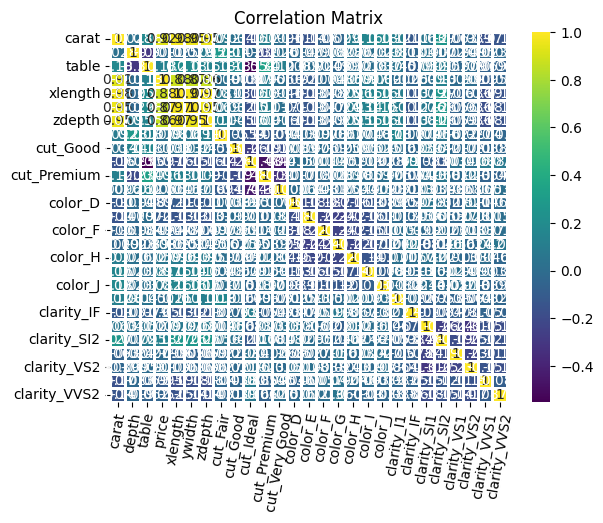

In [16]:
print("Correlation Matrix:\n", data.corr())

plt.figure(dpi=100)
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), annot=True, lw=1, cmap="viridis", linecolor='white')
plt.xticks(rotation=80)
plt.show()

## 📈 Linear SVR: Predicting Carat from xlength

This model applies **Linear Support Vector Regression (SVR)** to predict the carat weight of a diamond based on its `xlength`.

- A **StandardScaler** normalizes the input feature (`xlength`).
- A **LinearSVR** model is trained on the scaled data.
- The model outputs:
  - **R² Score** – to measure the model’s explanatory power.
  - **MSE (Mean Squared Error)** – to evaluate prediction error.
  - **Intercept and Coefficient** of the linear model.
- A plot shows:
  - The actual data (blue scatter)
  - The linear regression line (red)

This analysis explores whether diamond length is a good predictor of its carat.

R^2: 0.9395627560526204
Mean Squared Error: 0.013579190720550777
Intercept: [0.77347507]
Slope: [0.41828941]


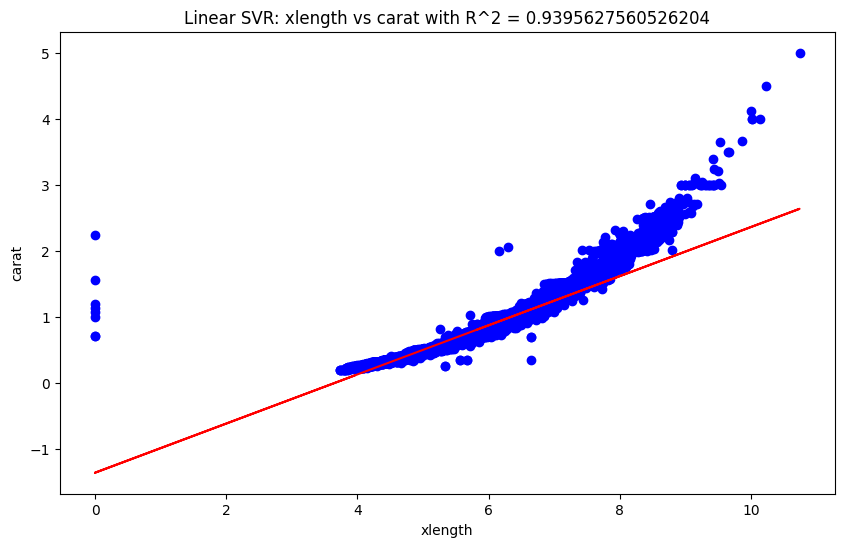

Time of execution:  0.39727187156677246 seconds


In [17]:
svr_linear(data, 'xlength', 'carat')

## 📈 Polynomial SVR: Predicting Carat from xlength

This model applies **Support Vector Regression with a Polynomial Kernel (degree = 2)** to capture non-linear relationships between `xlength` and carat.

- Input is transformed with `PolynomialFeatures` before fitting.
- Pipeline includes:
  - `StandardScaler` for feature normalization.
  - `SVR (poly kernel)` for regression with curved decision boundaries.
- Outputs:
  - **R² Score**
  - **Intercept**
  - Visualization of the curve fit

This helps determine whether a non-linear model improves carat prediction.

R^2:  0.9925398040516453
Intercept:  [0.74708033]


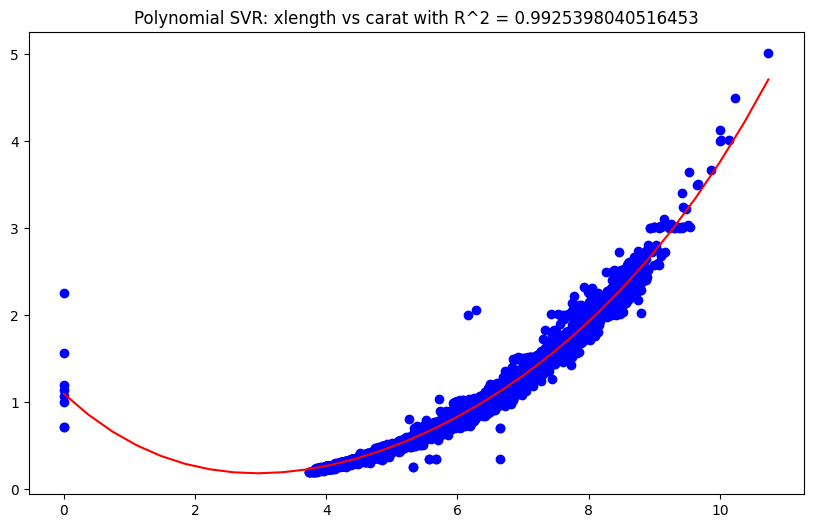

Time of execution:  81.79315972328186 seconds


In [18]:
svr_poly(data, 'xlength', 'carat')

## 📈 RBF SVR: Predicting Carat from xlength

This model uses **SVR with an RBF (Radial Basis Function) Kernel** to model complex, non-linear relationships between `xlength` and carat.

- Pipeline includes:
  - `StandardScaler`
  - `SVR` with an RBF kernel (`C=1`, `epsilon=0.1`)
- Outputs:
  - **R² Score**
  - **Intercept**
  - Smooth non-linear prediction curve over the scatter plot

Ideal for capturing non-linear trends in the data.

R^2:  0.992629510712502
Intercept:  [1.67983637]


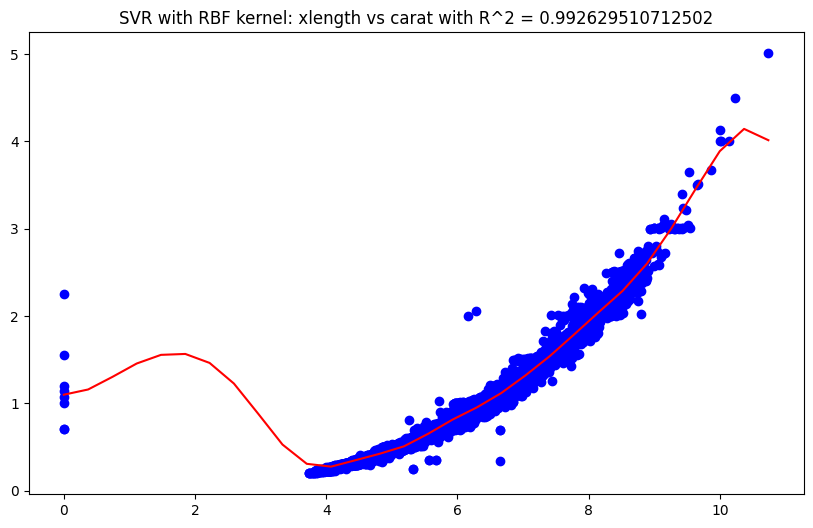

Time of execution:  5.053143501281738 seconds


In [19]:
svr_rbf(data, 'xlength', 'carat')

## 🤖 Linear SVC: Classifying 'Ideal' Cut Diamonds

This classification model uses a **Linear Support Vector Classifier (LinearSVC)** to determine whether a diamond is of `cut_Ideal` quality based on `xlength` and `ywidth`.

- Pipeline includes:
  - `StandardScaler`
  - `LinearSVC` (linear decision boundaries)
- Evaluation:
  - **Accuracy**, **MCC**, **Confusion Matrix**
  - **Decision Region Plot**

Useful for detecting if diamond dimensions linearly separate ideal cuts.

Matthews Correlation Coefficient:  0.00012997771995387867

KERNEL: linear
Score: 0.5864849833147943
Confusion Matrix:
[[5997  499]
 [3962  330]]


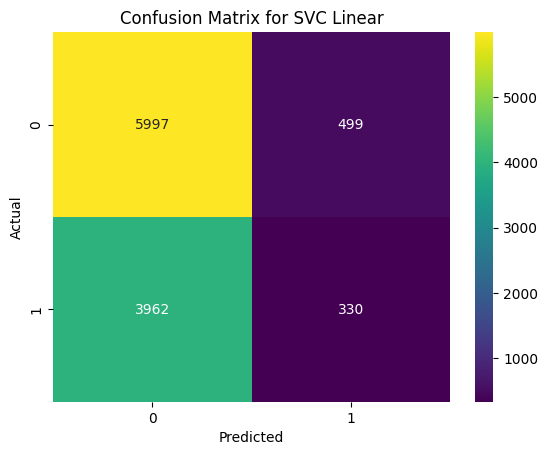

              precision    recall  f1-score   support

           0       0.60      0.92      0.73      6496
           1       0.40      0.08      0.13      4292

    accuracy                           0.59     10788
   macro avg       0.50      0.50      0.43     10788
weighted avg       0.52      0.59      0.49     10788



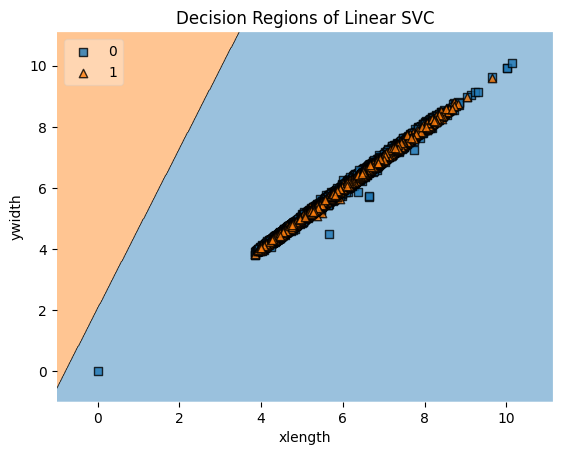

Time of execution:  0.2747311592102051 seconds


In [22]:
linear_svc(data, ['xlength', 'ywidth'], 'cut_Ideal')

## 🤖 Polynomial SVC: Classifying 'Ideal' Cut Diamonds

This model applies **SVC with a Polynomial Kernel (degree = 2)** to classify whether a diamond is `cut_Ideal`.

- Dataset is balanced with **RandomUnderSampler**.
- Pipeline includes:
  - `StandardScaler`
  - `SVC` with polynomial kernel
- Outputs:
  - Classification metrics
  - Confusion matrix
  - Decision boundary visualization

Helps identify curved class boundaries based on dimensions.

Matthews Correlation Coefficient:  0.08482685278262239

KERNEL: polynomial
Score: 0.5172553796183516
Confusion Matrix:
[[ 656 8009]
 [ 314 8262]]


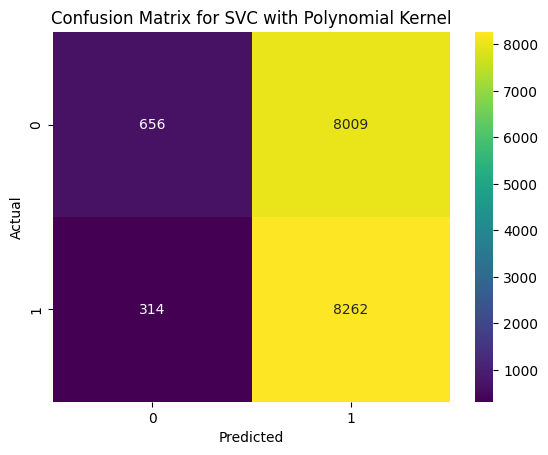

              precision    recall  f1-score   support

           0       0.68      0.08      0.14      8665
           1       0.51      0.96      0.67      8576

    accuracy                           0.52     17241
   macro avg       0.59      0.52      0.40     17241
weighted avg       0.59      0.52      0.40     17241



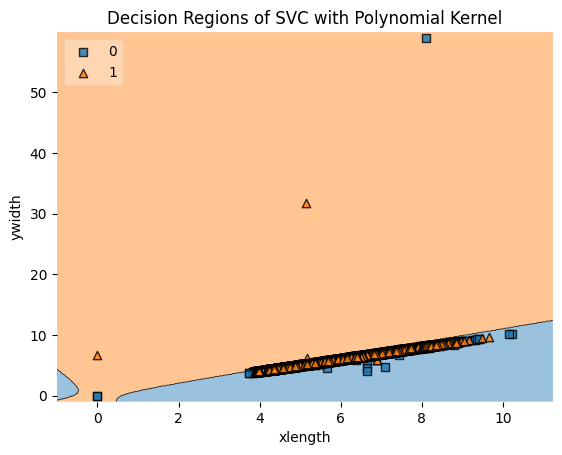

Time of execution:  67.44951033592224 seconds


In [25]:
poly_svc(data, ['xlength', 'ywidth'], 'cut_Ideal')

## 🤖 RBF SVC: Classifying 'Ideal' Cut Diamonds

This model uses **SVC with an RBF Kernel** to classify diamonds as `cut_Ideal`.

- Dataset is undersampled for class balance.
- Pipeline:
  - `StandardScaler`
  - `SVC` with RBF kernel
- Performance is evaluated using:
  - **Accuracy**
  - **MCC**
  - **Confusion Matrix**
  - **Decision Region Plot**

Best suited for modeling highly non-linear class separation.

Matthews Correlation Coefficient:  0.18207485403356577

KERNEL: rbf
Score: 0.59103300272606
Confusion Matrix:
[[5112 3553]
 [3498 5078]]


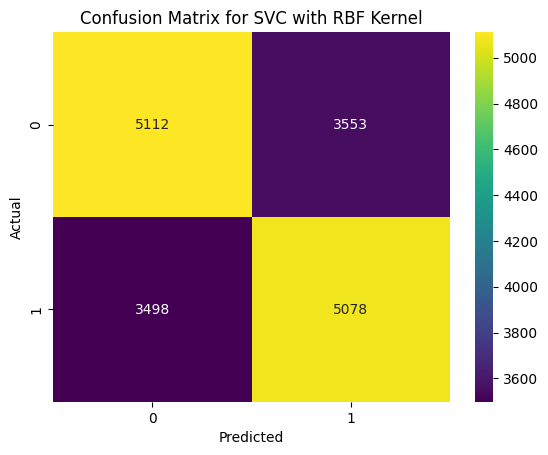

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      8665
           1       0.59      0.59      0.59      8576

    accuracy                           0.59     17241
   macro avg       0.59      0.59      0.59     17241
weighted avg       0.59      0.59      0.59     17241



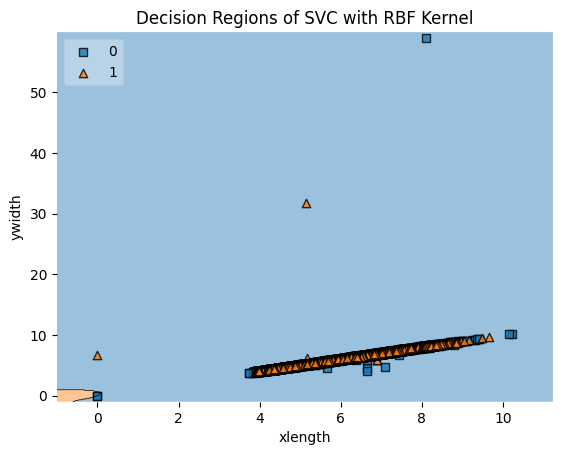

Time of execution:  286.6820340156555 seconds


In [28]:
rbf_svc(data, ['xlength', 'ywidth'], 'cut_Ideal')

## 🤖 k-Nearest Neighbors (kNN): Classifying 'Ideal' Cut Diamonds

This model uses a **k-Nearest Neighbors Classifier (k=7)** to predict if a diamond is of `cut_Ideal` quality.

- Data is balanced using **RandomUnderSampler**
- Features are normalized with `StandardScaler`
- Outputs:
  - **Accuracy**
  - **Confusion Matrix**
  - **Classification Report**
  - **ROC Curve and AUC**
  - **Cross-Validation Scores**

kNN makes decisions based on similarity to nearby samples in feature space.

kNN score without cross-validation:  0.6299733209604454


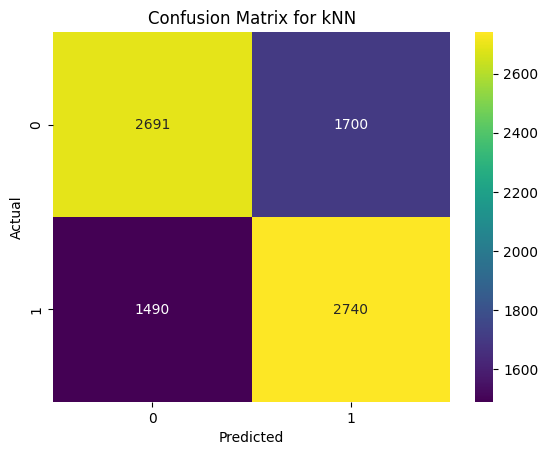

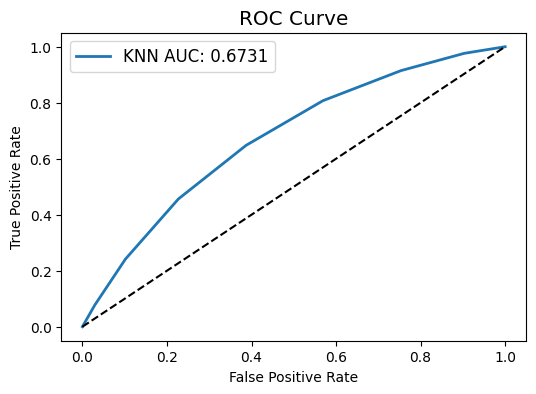

              precision    recall  f1-score   support

           0       0.64      0.61      0.63      4391
           1       0.62      0.65      0.63      4230

    accuracy                           0.63      8621
   macro avg       0.63      0.63      0.63      8621
weighted avg       0.63      0.63      0.63      8621

Cross-validation scores: [0.64482459 0.62412993 0.63776102 0.64820186 0.62819026 0.62035963
 0.64559165 0.62354988 0.6412413  0.64095128]
Average cross-validation score:  0.6354801384980615
Time of execution:  0.9977293014526367 seconds


In [29]:
knn_classifier(data, ['xlength', 'ywidth'], 'cut_Ideal')